In [1]:
import os
import sys
!{sys.executable} -m pip install tensorflow pandas numpy sklearn imread resize 
import tensorflow as tf

!{sys.executable} -m pip install pandas numpy sklearn imread #  resize
print (tf.__version__)
from platform import python_version

print(python_version())


  Using cached resize-0.1.0-py3-none-any.whl
  Using cached docopt-0.6.2-py2.py3-none-any.whl
  Using cached Pillow-5.3.0.tar.gz (15.6 MB)
  Preparing metadata (setup.py) ... done
  ERROR: Command errored out with exit status 1:
   command: /home/jordi/TFM/TFM/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-qttct9d7/pillow_b635af34e7274b5ca067ee6a7b96064e/setup.py'"'"'; __file__='"'"'/tmp/pip-install-qttct9d7/pillow_b635af34e7274b5ca067ee6a7b96064e/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-hpflshpe
       cwd: /tmp/pip-install-qttct9d7/pillow_b635af34e7274b5ca067ee6a7b96064e/
  Complete output (174 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  c

Failed to build Pillow
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.2.0
    Uninstalling Pillow-7.2.0:
      Successfully uninstalled Pillow-7.2.0
    Running setup.py install for Pillow ... error
    ERROR: Command errored out with exit status 1:
     command: /home/jordi/TFM/TFM/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-qttct9d7/pillow_b635af34e7274b5ca067ee6a7b96064e/setup.py'"'"'; __file__='"'"'/tmp/pip-install-qttct9d7/pillow_b635af34e7274b5ca067ee6a7b96064e/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-eautfvp9/install-record.txt --single-version-externally-managed --compile --install-headers /home/jordi/TFM/TFM/include/site/python3.8/Pillow
  

2.6.0
3.8.10


In [2]:
# Obtenemos lista de nombres de ficheros de secuencias ya pasadas letras a numérico borra ficheros vacíos
!pip install pandas

import pandas as pd
import numpy as np
import os
import shutil


#Ficheros para Train y validation
pathDataset = os.path.join("./datasetFlancoDerecho")

# Ficheros para el dataset de Test
pathTestDataset = os.path.join("./testDatasetFlancoDerecho")


# https://www.tensorflow.org/tutorials/load_data/images


In [10]:
!pip install pandas

import pandas as pd
import numpy as np
import os
import shutil
from tensorflow.keras.preprocessing import image_dataset_from_directory
import pathlib
lote = 128
dimensiones_imagenes= (20,40)
semilla=42


Train = image_dataset_from_directory(pathDataset,validation_split=0.2,
                                                 color_mode="grayscale", batch_size=lote, subset = "training", 
                                                 image_size=dimensiones_imagenes, seed = semilla)


classes = Train.class_names
print(classes)

Val = image_dataset_from_directory(pathDataset,validation_split=0.2,
                                                 color_mode="grayscale", batch_size=lote, subset = "validation", 
                                                 image_size=dimensiones_imagenes, seed = semilla) 
print(classes)

Found 2269833 files belonging to 2 classes.
Using 1815867 files for training.


2021-10-23 13:21:42.747909: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 43580808 exceeds 10% of free system memory.


['ConAlu', 'SinAlu']
Found 2269833 files belonging to 2 classes.
Using 453966 files for validation.
['ConAlu', 'SinAlu']


In [11]:

Test = image_dataset_from_directory(pathTestDataset,validation_split=0.0,
                                                 color_mode="grayscale", batch_size=lote,  
                                                 image_size=dimensiones_imagenes, seed = semilla)

print(classes)

Found 398606 files belonging to 2 classes.
['ConAlu', 'SinAlu']


In [12]:
!pip install tensorflow-gpu

In [13]:
import tensorflow as tf
#tf.test.is_built_with_cuda()
#tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)
#tf.config.list_physical_devices('GPU')
#os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [14]:
for image_batch, labels_batch in Train:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(128, 20, 40, 1)
(128,)


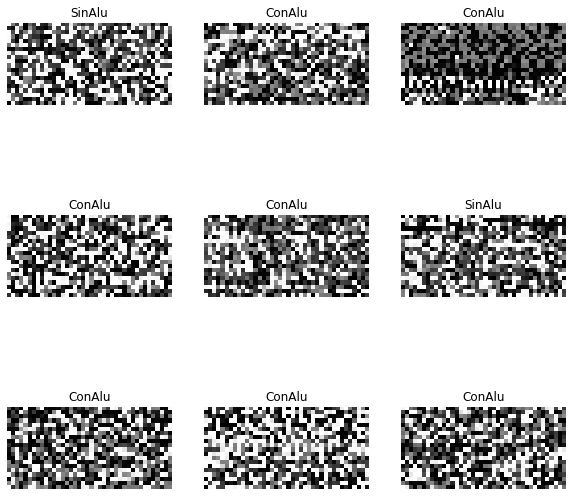

In [15]:
!pip install matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in Train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"),cmap='gray', vmin=0, vmax=255)
        plt.title(classes[labels[i]])
        plt.axis("off")


In [16]:
import numpy as np
import pandas as pd

#from skimage.io import imread
import imread
# from skimage.transform import resize
#!pip install resize

# import resize
import tensorflow as tf
# from tensorflow import keras
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
print(tf.test.gpu_device_name())
print("?")
#config = tf.compat.v1.ConfigProto() 
#config.gpu_options.per_process_gpu_memory_fraction = 0.9
#tf.keras.backend.tensorflow_backend.set_session(tf.Session(config=config))
#gpu_devices = tf.config.experimental.list_physical_devices('GPU')
#for device in gpu_devices:
#    tf.config.experimental.set_memory_growth(device, True)


from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten,  Rescaling
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical

Num GPUs Available:  1
Physical devices cannot be modified after being initialized
/device:GPU:0
?


2021-10-23 13:22:36.411767: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-23 13:22:36.412085: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-23 13:22:36.412279: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-23 13:22:36.412522: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-23 13:22:36.412719: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [17]:
import tensorflow as tf
tf.test.gpu_device_name()

2021-10-23 13:22:41.503509: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-23 13:22:41.503821: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-23 13:22:41.504012: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-23 13:22:41.504243: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-23 13:22:41.504434: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

'/device:GPU:0'

In [18]:
Train= Train.prefetch(buffer_size=64)
Val= Val.prefetch(buffer_size=64)

In [21]:
model = Sequential()
model.add(Rescaling(1./255,input_shape=(20,40,1)))
model.add(Conv2D(filters = 64, kernel_size = (2,2), activation ='relu',padding="same",input_shape=(20,40,1)))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 64, kernel_size = (2,2), padding="same", activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3 ))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (2,2),padding="same", activation ='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 128, kernel_size = (2,2), padding="same", activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 256, kernel_size = (2,2), padding="same", activation ='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters = 256, kernel_size = (2,2), padding="same", activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu")) #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(60, activation = "relu")) #Fully connected layer
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid")) #Classification layer or output layer

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 20, 40, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 20, 40, 64)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 20, 40, 64)        256       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 20, 40, 64)        16448     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 20, 64)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 10, 20, 64)        256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 20, 64)       

In [22]:
epocas=100


In [23]:
evolucionEntrenamiento = model.fit(Train, validation_data = Val, epochs= epocas)

Epoch 1/100


2021-10-23 13:31:55.120498: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8204
2021-10-23 13:31:56.320506: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-10-23 13:31:57.622043: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


14187/14187 [==============================] - 304s 21ms/step - loss: 0.5258 - accuracy: 0.6984 - val_loss: 0.5088 - val_accuracy: 0.7023
Epoch 2/100
14187/14187 [==============================] - 298s 21ms/step - loss: 0.4946 - accuracy: 0.7170 - val_loss: 0.4879 - val_accuracy: 0.7201
Epoch 3/100
14187/14187 [==============================] - 296s 21ms/step - loss: 0.4845 - accuracy: 0.7267 - val_loss: 0.4774 - val_accuracy: 0.7343
Epoch 4/100
14187/14187 [==============================] - 294s 21ms/step - loss: 0.4766 - accuracy: 0.7352 - val_loss: 0.4590 - val_accuracy: 0.7490
Epoch 5/100
14187/14187 [==============================] - 291s 20ms/step - loss: 0.4703 - accuracy: 0.7413 - val_loss: 0.4576 - val_accuracy: 0.7530
Epoch 6/100
14187/14187 [==============================] - 290s 20ms/step - loss: 0.4651 - accuracy: 0.7465 - val_loss: 0.4481 - val_accuracy: 0.7592
Epoch 7/100
14187/14187 [==============================] - 289s 20ms/step - loss: 0.4603 - accuracy: 0.7508 - va

14187/14187 [==============================] - 295s 21ms/step - loss: 0.3774 - accuracy: 0.8175 - val_loss: 0.3404 - val_accuracy: 0.8469
Epoch 56/100
14187/14187 [==============================] - 289s 20ms/step - loss: 0.3770 - accuracy: 0.8179 - val_loss: 0.3436 - val_accuracy: 0.8440
Epoch 57/100
14187/14187 [==============================] - 291s 21ms/step - loss: 0.3763 - accuracy: 0.8182 - val_loss: 0.3383 - val_accuracy: 0.8482
Epoch 58/100
14187/14187 [==============================] - 290s 20ms/step - loss: 0.3757 - accuracy: 0.8187 - val_loss: 0.3363 - val_accuracy: 0.8490
Epoch 59/100
14187/14187 [==============================] - 295s 21ms/step - loss: 0.3752 - accuracy: 0.8191 - val_loss: 0.3367 - val_accuracy: 0.8496
Epoch 60/100
14187/14187 [==============================] - 298s 21ms/step - loss: 0.3745 - accuracy: 0.8194 - val_loss: 0.3344 - val_accuracy: 0.8526
Epoch 61/100
14187/14187 [==============================] - 291s 20ms/step - loss: 0.3742 - accuracy: 0.819

In [24]:
model.save("20211024")

2021-10-23 21:36:28.910784: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: 20211024/assets


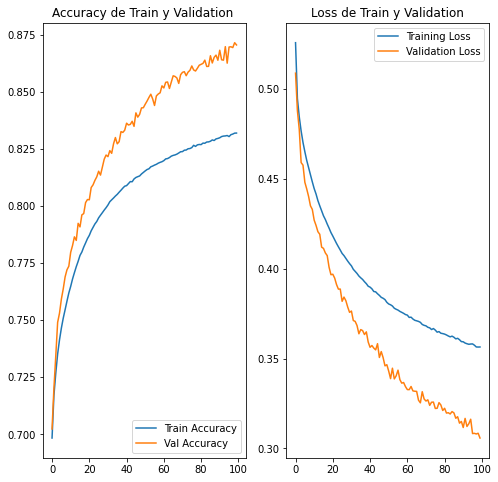

In [25]:
acc = evolucionEntrenamiento.history['accuracy']
val_acc = evolucionEntrenamiento.history['val_accuracy']

loss = evolucionEntrenamiento.history['loss']
val_loss = evolucionEntrenamiento.history['val_loss']

epochs_range = range(epocas)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy de Train y Validation ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss de Train y Validation')
plt.show()


In [26]:
from keras.models import Sequential, Model, load_model # , evaluate, predict
score = model.evaluate(Test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


3115/3115 [==============================] - 20s 6ms/step - loss: 0.4461 - accuracy: 0.7701
Test loss: 0.4460911154747009 / Test accuracy: 0.7701264023780823


In [27]:
score=model.predict(Test)


In [28]:
print(score)
display(score)

[[2.8945602e-04]
 [9.0203172e-01]
 [6.4094298e-02]
 ...
 [6.0837348e-05]
 [7.3374367e-01]
 [2.7153385e-06]]


array([[2.8945602e-04],
       [9.0203172e-01],
       [6.4094298e-02],
       ...,
       [6.0837348e-05],
       [7.3374367e-01],
       [2.7153385e-06]], dtype=float32)

In [29]:
evolucionEntrenammiento_Plus50 = model.fit(Train, validation_data = Val, epochs= 50)

Epoch 1/50
14187/14187 [==============================] - 298s 21ms/step - loss: 0.3556 - accuracy: 0.8324 - val_loss: 0.3046 - val_accuracy: 0.8722
Epoch 2/50
14187/14187 [==============================] - 292s 21ms/step - loss: 0.3554 - accuracy: 0.8327 - val_loss: 0.3038 - val_accuracy: 0.8720
Epoch 3/50
14187/14187 [==============================] - 289s 20ms/step - loss: 0.3556 - accuracy: 0.8322 - val_loss: 0.3070 - val_accuracy: 0.8710
Epoch 4/50
14187/14187 [==============================] - 289s 20ms/step - loss: 0.3556 - accuracy: 0.8324 - val_loss: 0.3068 - val_accuracy: 0.8729
Epoch 5/50
14187/14187 [==============================] - 289s 20ms/step - loss: 0.3549 - accuracy: 0.8326 - val_loss: 0.3078 - val_accuracy: 0.8719
Epoch 6/50
14187/14187 [==============================] - 290s 20ms/step - loss: 0.3541 - accuracy: 0.8334 - val_loss: 0.3011 - val_accuracy: 0.8757
Epoch 7/50
14187/14187 [==============================] - 290s 20ms/step - loss: 0.3535 - accuracy: 0.8336

In [30]:
model.save("20211025")

INFO:tensorflow:Assets written to: 20211025/assets


In [31]:
from keras.models import Sequential, Model, load_model # , evaluate, predict
score = model.evaluate(Test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
score=model.predict(Test)


3115/3115 [==============================] - 19s 6ms/step - loss: 0.4524 - accuracy: 0.7692
Test loss: 0.45240235328674316 / Test accuracy: 0.7692458033561707


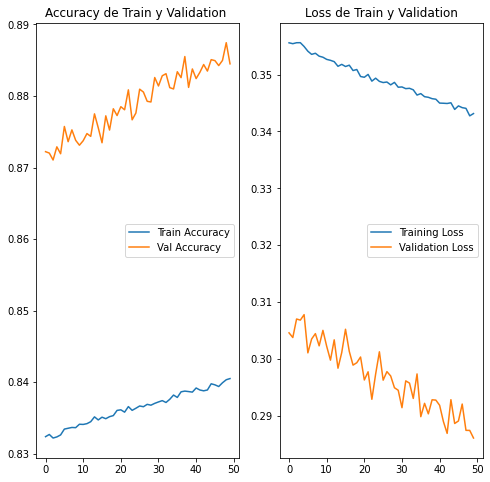

In [32]:
acc = evolucionEntrenammiento_Plus50.history['accuracy']
val_acc = evolucionEntrenammiento_Plus50.history['val_accuracy']

loss = evolucionEntrenammiento_Plus50.history['loss']
val_loss = evolucionEntrenammiento_Plus50.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='center right')
plt.title('Accuracy de Train y Validation ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='center right')
plt.title('Loss de Train y Validation')
plt.show()


In [33]:
evolucionEntrenammiento_Plus100 = model.fit(Train, validation_data = Val, epochs= 50)

Epoch 1/50
14187/14187 [==============================] - 289s 20ms/step - loss: 0.3429 - accuracy: 0.8400 - val_loss: 0.2885 - val_accuracy: 0.8851
Epoch 2/50
14187/14187 [==============================] - 289s 20ms/step - loss: 0.3426 - accuracy: 0.8407 - val_loss: 0.2878 - val_accuracy: 0.8861
Epoch 3/50
14187/14187 [==============================] - 290s 20ms/step - loss: 0.3429 - accuracy: 0.8404 - val_loss: 0.2908 - val_accuracy: 0.8876
Epoch 4/50
14187/14187 [==============================] - 290s 20ms/step - loss: 0.3424 - accuracy: 0.8406 - val_loss: 0.2878 - val_accuracy: 0.8863
Epoch 5/50
14187/14187 [==============================] - 289s 20ms/step - loss: 0.3427 - accuracy: 0.8404 - val_loss: 0.2868 - val_accuracy: 0.8879
Epoch 6/50
14187/14187 [==============================] - 289s 20ms/step - loss: 0.3420 - accuracy: 0.8407 - val_loss: 0.2853 - val_accuracy: 0.8850
Epoch 7/50
14187/14187 [==============================] - 290s 20ms/step - loss: 0.3421 - accuracy: 0.8410

INFO:tensorflow:Assets written to: 20211026/assets


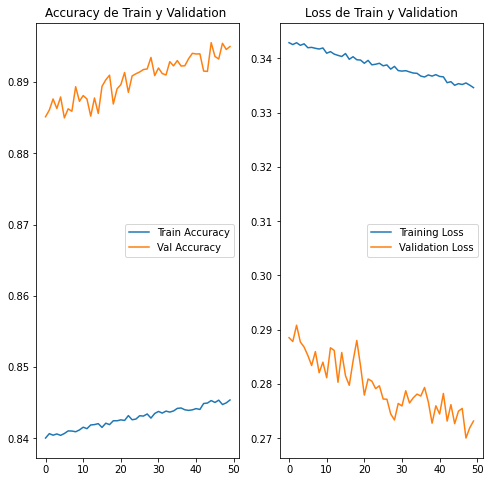

In [34]:
model.save("20211026")

acc = evolucionEntrenammiento_Plus100.history['accuracy']
val_acc = evolucionEntrenammiento_Plus100.history['val_accuracy']

loss = evolucionEntrenammiento_Plus100.history['loss']
val_loss = evolucionEntrenammiento_Plus100.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='center right')
plt.title('Accuracy de Train y Validation ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='center right')
plt.title('Loss de Train y Validation')
plt.show()


In [35]:
from keras.models import Sequential, Model, load_model # , evaluate, predict
score = model.evaluate(Test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
score=model.predict(Test)

3115/3115 [==============================] - 19s 6ms/step - loss: 0.4579 - accuracy: 0.7676
Test loss: 0.4579203426837921 / Test accuracy: 0.767612636089325


In [36]:
evolucionEntrenammiento_Plus150 = model.fit(Train, validation_data = Val, epochs= 50)

Epoch 1/50
14187/14187 [==============================] - 289s 20ms/step - loss: 0.3349 - accuracy: 0.8451 - val_loss: 0.2737 - val_accuracy: 0.8951
Epoch 2/50
14187/14187 [==============================] - 290s 20ms/step - loss: 0.3345 - accuracy: 0.8456 - val_loss: 0.2715 - val_accuracy: 0.8939
Epoch 3/50
14187/14187 [==============================] - 290s 20ms/step - loss: 0.3346 - accuracy: 0.8454 - val_loss: 0.2690 - val_accuracy: 0.8952
Epoch 4/50
14187/14187 [==============================] - 290s 20ms/step - loss: 0.3345 - accuracy: 0.8456 - val_loss: 0.2704 - val_accuracy: 0.8970
Epoch 5/50
14187/14187 [==============================] - 289s 20ms/step - loss: 0.3347 - accuracy: 0.8454 - val_loss: 0.2704 - val_accuracy: 0.8964
Epoch 6/50
14187/14187 [==============================] - 289s 20ms/step - loss: 0.3347 - accuracy: 0.8453 - val_loss: 0.2720 - val_accuracy: 0.8958
Epoch 7/50
14187/14187 [==============================] - 290s 20ms/step - loss: 0.3337 - accuracy: 0.8462

INFO:tensorflow:Assets written to: 20211027/assets


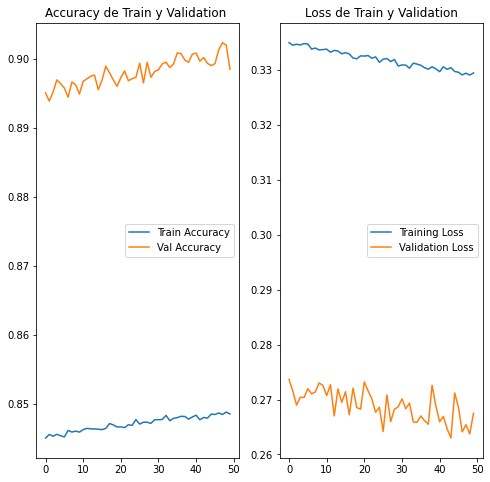

In [37]:
model.save("20211027")

acc = evolucionEntrenammiento_Plus150.history['accuracy']
val_acc = evolucionEntrenammiento_Plus150.history['val_accuracy']

loss = evolucionEntrenammiento_Plus150.history['loss']
val_loss = evolucionEntrenammiento_Plus150.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='center right')
plt.title('Accuracy de Train y Validation ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='center right')
plt.title('Loss de Train y Validation')
plt.show()

In [38]:
from keras.models import Sequential, Model, load_model # , evaluate, predict
score = model.evaluate(Test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
score=model.predict(Test)


3115/3115 [==============================] - 20s 6ms/step - loss: 0.4567 - accuracy: 0.7675
Test loss: 0.4566953480243683 / Test accuracy: 0.7674922347068787


In [39]:
evolucionEntrenammiento_Plus200 = model.fit(Train, validation_data = Val, epochs= 50)

Epoch 1/50
14187/14187 [==============================] - 298s 21ms/step - loss: 0.3291 - accuracy: 0.8489 - val_loss: 0.2638 - val_accuracy: 0.9014
Epoch 2/50
14187/14187 [==============================] - 299s 21ms/step - loss: 0.3287 - accuracy: 0.8491 - val_loss: 0.2628 - val_accuracy: 0.9022
Epoch 3/50
14187/14187 [==============================] - 298s 21ms/step - loss: 0.3294 - accuracy: 0.8487 - val_loss: 0.2680 - val_accuracy: 0.9014
Epoch 4/50
14187/14187 [==============================] - 298s 21ms/step - loss: 0.3287 - accuracy: 0.8494 - val_loss: 0.2618 - val_accuracy: 0.9034
Epoch 5/50
14187/14187 [==============================] - 292s 21ms/step - loss: 0.3286 - accuracy: 0.8491 - val_loss: 0.2643 - val_accuracy: 0.9005
Epoch 6/50
14187/14187 [==============================] - 295s 21ms/step - loss: 0.3284 - accuracy: 0.8495 - val_loss: 0.2629 - val_accuracy: 0.9014
Epoch 7/50
14187/14187 [==============================] - 292s 21ms/step - loss: 0.3280 - accuracy: 0.8494

INFO:tensorflow:Assets written to: 20211028/assets


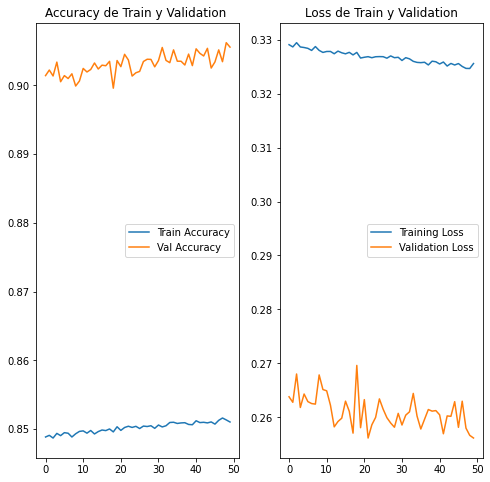

In [40]:
model.save("20211028")

acc = evolucionEntrenammiento_Plus200.history['accuracy']
val_acc = evolucionEntrenammiento_Plus200.history['val_accuracy']

loss = evolucionEntrenammiento_Plus200.history['loss']
val_loss = evolucionEntrenammiento_Plus200.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='center right')
plt.title('Accuracy de Train y Validation ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='center right')
plt.title('Loss de Train y Validation')
plt.show()

In [41]:
from keras.models import Sequential, Model, load_model # , evaluate, predict
score = model.evaluate(Test)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
score=model.predict(Test)

3115/3115 [==============================] - 19s 6ms/step - loss: 0.4632 - accuracy: 0.7655
Test loss: 0.46315231919288635 / Test accuracy: 0.765505313873291


In [42]:
evolucionEntrenammiento_Plus250 = model.fit(Train, validation_data = Val, epochs= 50)

Epoch 1/50
14187/14187 [==============================] - 299s 21ms/step - loss: 0.3250 - accuracy: 0.8510 - val_loss: 0.2559 - val_accuracy: 0.9057
Epoch 2/50
14187/14187 [==============================] - 292s 21ms/step - loss: 0.3250 - accuracy: 0.8513 - val_loss: 0.2546 - val_accuracy: 0.9052
Epoch 3/50
14187/14187 [==============================] - 289s 20ms/step - loss: 0.3250 - accuracy: 0.8515 - val_loss: 0.2585 - val_accuracy: 0.9069
Epoch 4/50
14187/14187 [==============================] - 290s 20ms/step - loss: 0.3247 - accuracy: 0.8515 - val_loss: 0.2574 - val_accuracy: 0.9058
Epoch 5/50
14187/14187 [==============================] - 290s 20ms/step - loss: 0.3239 - accuracy: 0.8520 - val_loss: 0.2594 - val_accuracy: 0.9025
Epoch 6/50
14187/14187 [==============================] - 289s 20ms/step - loss: 0.3245 - accuracy: 0.8518 - val_loss: 0.2543 - val_accuracy: 0.9055
Epoch 7/50
14187/14187 [==============================] - 290s 20ms/step - loss: 0.3238 - accuracy: 0.8518

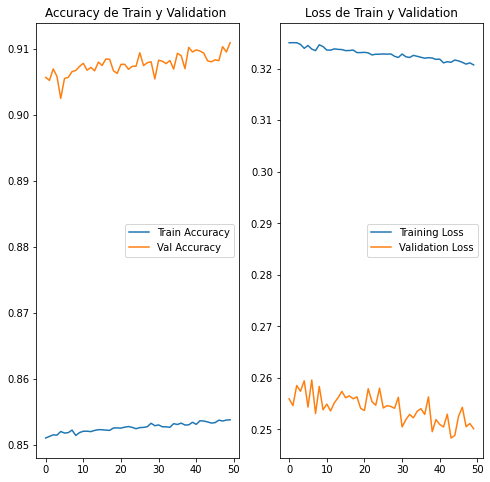

In [45]:
acc = evolucionEntrenammiento_Plus250.history['accuracy']
val_acc = evolucionEntrenammiento_Plus250.history['val_accuracy']

loss = evolucionEntrenammiento_Plus250.history['loss']
val_loss = evolucionEntrenammiento_Plus250.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='center right')
plt.title('Accuracy de Train y Validation ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='center right')
plt.title('Loss de Train y Validation')
plt.show()

In [44]:
score = model.evaluate(Test,batch_size=128)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

3115/3115 [==============================] - 20s 6ms/step - loss: 0.4666 - accuracy: 0.7642
Test loss: 0.46664607524871826 / Test accuracy: 0.764173150062561


In [46]:
evolucionEntrenammiento_Plus350 = model.fit(Train, validation_data = Val, epochs= 100)

Epoch 1/100
14187/14187 [==============================] - 299s 21ms/step - loss: 0.3214 - accuracy: 0.8537 - val_loss: 0.2560 - val_accuracy: 0.9096
Epoch 2/100
14187/14187 [==============================] - 292s 21ms/step - loss: 0.3207 - accuracy: 0.8537 - val_loss: 0.2542 - val_accuracy: 0.9085
Epoch 3/100
14187/14187 [==============================] - 289s 20ms/step - loss: 0.3206 - accuracy: 0.8537 - val_loss: 0.2514 - val_accuracy: 0.9097
Epoch 4/100
14187/14187 [==============================] - 290s 20ms/step - loss: 0.3210 - accuracy: 0.8539 - val_loss: 0.2495 - val_accuracy: 0.9121
Epoch 5/100
14187/14187 [==============================] - 291s 20ms/step - loss: 0.3206 - accuracy: 0.8541 - val_loss: 0.2505 - val_accuracy: 0.9102
Epoch 6/100
14187/14187 [==============================] - 291s 21ms/step - loss: 0.3218 - accuracy: 0.8532 - val_loss: 0.2507 - val_accuracy: 0.9091
Epoch 7/100
14187/14187 [==============================] - 289s 20ms/step - loss: 0.3215 - accuracy:

14187/14187 [==============================] - 290s 20ms/step - loss: 0.3178 - accuracy: 0.8555 - val_loss: 0.2452 - val_accuracy: 0.9125
Epoch 56/100
14187/14187 [==============================] - 291s 20ms/step - loss: 0.3174 - accuracy: 0.8562 - val_loss: 0.2469 - val_accuracy: 0.9135
Epoch 57/100
14187/14187 [==============================] - 291s 21ms/step - loss: 0.3178 - accuracy: 0.8555 - val_loss: 0.2450 - val_accuracy: 0.9133
Epoch 58/100
14187/14187 [==============================] - 289s 20ms/step - loss: 0.3185 - accuracy: 0.8551 - val_loss: 0.2476 - val_accuracy: 0.9132
Epoch 59/100
14187/14187 [==============================] - 289s 20ms/step - loss: 0.3173 - accuracy: 0.8560 - val_loss: 0.2480 - val_accuracy: 0.9122
Epoch 60/100
14187/14187 [==============================] - 290s 20ms/step - loss: 0.3172 - accuracy: 0.8558 - val_loss: 0.2459 - val_accuracy: 0.9130
Epoch 61/100
14187/14187 [==============================] - 291s 20ms/step - loss: 0.3175 - accuracy: 0.855

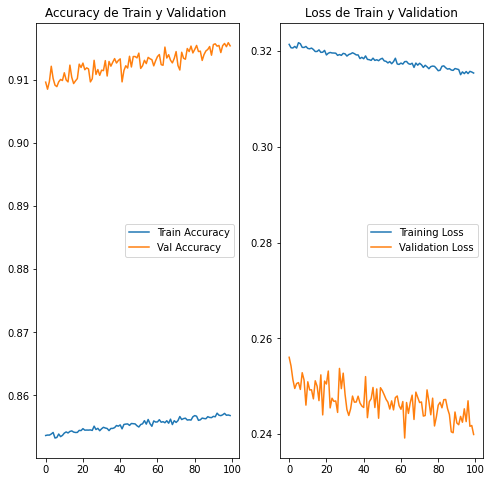

In [48]:
acc = evolucionEntrenammiento_Plus350.history['accuracy']
val_acc = evolucionEntrenammiento_Plus350.history['val_accuracy']

loss = evolucionEntrenammiento_Plus350.history['loss']
val_loss = evolucionEntrenammiento_Plus350.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='center right')
plt.title('Accuracy de Train y Validation ')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='center right')
plt.title('Loss de Train y Validation')
plt.show()

In [49]:
score = model.evaluate(Test,batch_size=128)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

3115/3115 [==============================] - 20s 6ms/step - loss: 0.4721 - accuracy: 0.7652
Test loss: 0.4720665514469147 / Test accuracy: 0.765196681022644
